# Human Activity Data on Kaggle

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

The Human Activity Recognition database was built from the recordings of 30 study participants (19 - 48 years old) performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) performed.

They were wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

For each record in the dataset the following is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A


## Load Data

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

% matplotlib inline

In [5]:
path = "./human-activity-recognition-with-smartphones/"
train_filename = "train.csv"
test_filename = "test.csv"
train = pd.read_csv(path+train_filename)
test = pd.read_csv(path+test_filename)

In [6]:
train.shape

(7352, 563)

In [7]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [135]:
train.columns.tolist()


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

Apparently, this dataset has been exploited by thousands of Kagglers and 97% accuracy is as easy as SVM + boosting. What I will do is try to predict for different subjects not activities.

However, the train and test set right now contains totally different subjects. What I will do is merge them, and randomly split the whole dataset into new train & test set.

In [150]:
# Merge current train and test
train_all = train.append(test)
# And split to 70% train, 30% test
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_all, test_size = 0.3)

In [151]:
# Split into variables and labels
X_train = train.iloc[:, :-2].values
y_train = train.iloc[:,-2].values
activity_train = train.iloc[:,-1].values

X_test = test.iloc[:, :-2].values
y_test = test.iloc[:,-2].values
activity_test = test.iloc[:,-1].values


In [152]:
y_test

array([30, 14,  4, ..., 23,  2,  8])

In [153]:
y_test.shape

(3090,)

In [154]:
# Some descriptive analysis
label, counts = np.unique(y_train, return_counts=True)
label, counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([260, 204, 232, 220, 190, 234, 216, 198, 199, 215, 223, 213, 211,
        240, 234, 256, 256, 270, 258, 247, 295, 221, 267, 256, 277, 265,
        270, 258, 255, 269]))

In [173]:
set(train['subject'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30}

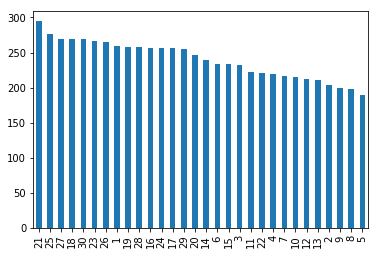

In [155]:
train['subject'].value_counts().plot(kind='bar')

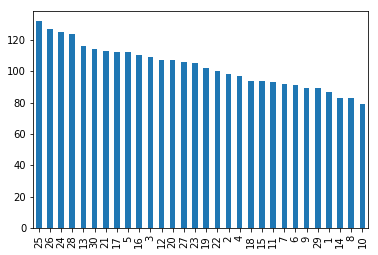

In [156]:
test['subject'].value_counts().plot(kind='bar')

The bar chart look pretty balanced. It seems that in training set, around 300 to 400 records were recorded for each and for test set 80 ~ 110 records were there for each.

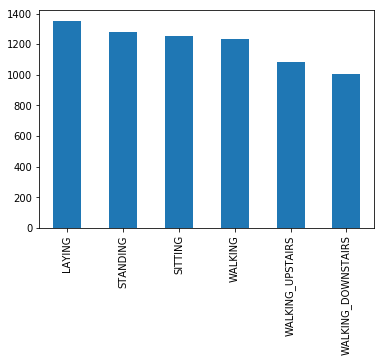

In [157]:
train['Activity'].value_counts().plot(kind='bar')

Although different people may very well sit, stand or lie down differnetly, I assume that the differences become more obvious when we are moving. So I will split the dataset into 2 subgroups, sedentary and moving, corresponds to laying + standing + sitting and walking + walking upstairs + walking downstairs respectively. 

In [158]:
y_train

array([19, 26,  9, ..., 13, 19,  2])

In [159]:
activity_train.shape

(7209,)

In [160]:
train_sedentary_ind = [i for i, a in enumerate(activity_train) if a == 'LAYING' or a == 'STANDING' or a == 'SITTING']
train_moving_ind = [i for i, a in enumerate(activity_train) if a == 'WALKING' or a == 'WALKING_UPSTAIRS' or a == 'WALKING_DOWNSTAIRS']
test_sedentary_ind = [i for i, a in enumerate(activity_test) if a == 'LAYING' or a == 'STANDING' or a == 'SITTING']
test_moving_ind = [i for i, a in enumerate(activity_test) if a == 'WALKING' or a == 'WALKING_UPSTAIRS' or a == 'WALKING_DOWNSTAIRS']

In [161]:
len(train_sedentary_ind), len(train_moving_ind)

(3890, 3319)

In [162]:
len(test_sedentary_ind), len(test_moving_ind)

(1737, 1353)

In [163]:
X_train_sedentary = X_train[train_sedentary_ind, :]
X_train_moving = X_train[train_moving_ind, :]

X_test_sedentary = X_test[test_sedentary_ind, :]
X_test_moving = X_test[test_moving_ind, :]

In [164]:
y_train_sedentary = y_train[train_sedentary_ind]
y_train_moving = y_train[train_moving_ind]

y_test_sedentary = y_test[test_sedentary_ind]
y_test_moving = y_test[test_moving_ind]

In [165]:
train.columns.tolist()[9]

'tBodyAcc-max()-X'

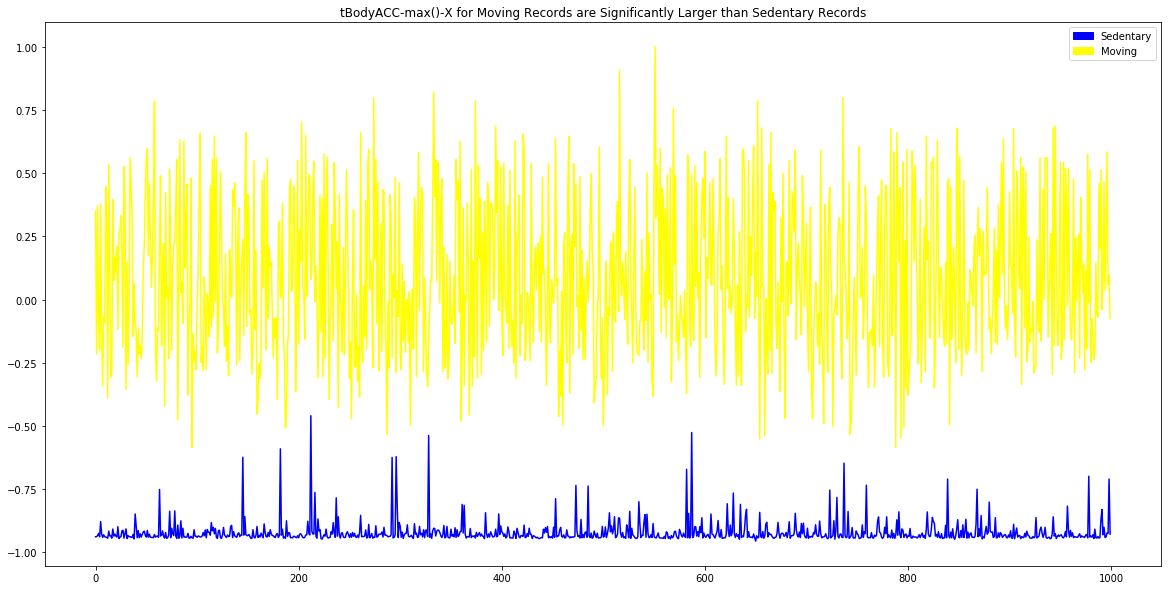

In [166]:
# Plot the max acceleration on the X axis

fig = plt.figure(figsize=(20,10)) 
plt.gca().set_color_cycle(['blue', 'yellow'])
plt.plot(X_train_sedentary[:1000, 9])
plt.plot(X_train_moving[:1000, 9])

blue_patch = mpatches.Patch(color='blue', label='Sedentary')
yellow_patch = mpatches.Patch(color='yellow', label='Moving')
plt.legend(handles=[blue_patch, yellow_patch])
plt.title("tBodyACC-max()-X for Moving Records are Significantly Larger than Sedentary Records")

The sensor data for moving and sedentary activities are actually very different as we expected. I will try to build a subject classifier using moving data and sedentary data respectively and see which one performs better. And this will give us an idea about are we more different when we move, or when we don't move.

Probably it will also make sense if we get more data of the subjects, their age, gender, weight, height we can try to run regression against these attribtues and find if there is a common trend in how people move and not move with regards to their physical conditions.


## Moving Data Preprocessing

We can see from here that we are facing a very different problem as we were having before. We have way too many features (563) for our model to avoid overfitting and generalize well in the test set. So we need to perform some feature selection/engineering before fed all of them into a model.

It also right in our intuitions because the sensors put on the same spot on yor left & right legs may have very similar readings but a delay in time. (if your walking is symmetric enough) It would be redundant to include all of the counterpairs. 

### Feature Selection 


- LinearSVC

In [167]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_moving, y_train_moving)
lsvc = SelectFromModel(lsvc, prefit=True)
X_train_moving_new = lsvc.transform(X_train_moving)
X_train_moving_new.shape

(3319, 123)

The linearSVC model selected 123 features out of 562, roughly 20% of them.

In [168]:
X_test_moving_new = lsvc.transform(X_test_moving)

- Sequential Forward Selection (SFS): experimented, but takes a very long time to select larger amount of features

In [36]:
# SFS 
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

knn = KNeighborsClassifier(n_neighbors=4)
sfs = SFS(knn, k_features=10, forward=True, floating=False, verbose=2, scoring='accuracy', cv=0)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 561 out of 561 | elapsed:   20.3s finished

[2017-09-21 15:21:34] Features: 1/10 -- score: 0.743199129489[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   19.3s finished

[2017-09-21 15:21:53] Features: 2/10 -- score: 0.894586507073[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 559 out of 559 | elapsed:   22.7s finished

[2017-09-21 15:22:16] Features: 3/10 -- score: 0.958922742111[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

## Sedentary Data Preprocessing

Let's do the same feature selection for sedentary data.

In [170]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_sedentary, y_train_sedentary)
lsvc = SelectFromModel(lsvc, prefit=True)
X_train_sedentary_new = lsvc.transform(X_train_sedentary)
X_train_sedentary_new.shape

(3890, 170)

For sedentary data, our feature selection algorithm has chosen 170 features, roughly 40% more than moving data, which means that sedentary records have less variance and share less correlations.

In [172]:
X_test_sedentary_new = lsvc.transform(X_test_sedentary)

### Normalization

Our data was already normalized to the range [-1, 1] so that would be all for the preprocessing so far.

## Modeling - Moving

### Baseline - Randomly Guessing

This is a baseline because by intuition any other informed classifier outperform this classifier.

In [188]:
from random import randint
rand_pred_moving = []
for x in X_test_moving_new:
    # generate a random number between 1 and 30 (including 1 & 30)
    rand_pred_moving.append(randint(1, 31))
rand_pred_moving = np.asarray(rand_pred_moving)

In [209]:
rand_res = [1 if a == b else 0 for a, b in zip(rand_pred_moving, y_test_moving)]
rand_acc = float(sum(rand_res))/len(rand_res)
rand_acc

0.028085735402808575

So randomly predicting almost failed the job, with only 3% accuracy.

In [234]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

Classifiers = [linear_model.LogisticRegression(),
               DecisionTreeClassifier(), 
               RandomForestClassifier(n_estimators=200),
               GradientBoostingClassifier(n_estimators=200),
               GaussianNB(), 
               svm.SVC()]

In [242]:
from sklearn.metrics import accuracy_score
from time import time
model = []
accuracy = []
train_time = []
pred_time = []

for clf in Classifiers:
    start = time()
    fit=clf.fit(X_train_moving, y_train_moving)
    end = time()
    train_time.append(end - start)
    start = time()
    pred=fit.predict(X_test_moving)
    end = time()
    pred_time.append(end - start)
    model.append(clf.__class__.__name__)
    accuracy.append(accuracy_score(y_test_moving,pred))


In [243]:
model

['LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'GradientBoostingClassifier',
 'GaussianNB',
 'SVC']

In [244]:
# Give shorter name for plotting 
model = ['LR', 'DT', 'RF', 'GB', 'GNB', 'SVC']

([<matplotlib.axis.XTick at 0x119edef10>,
 <a list of 6 Text xticklabel objects>)

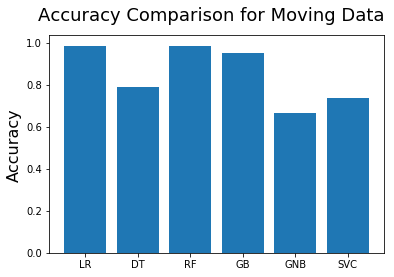

In [245]:
# Plot the accuracy for each classifier
fig = plt.figure()
index = np.arange(len(model))
plt.bar(index, accuracy)
fig.suptitle('Accuracy Comparison for Moving Data', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(index, model)

([<matplotlib.axis.XTick at 0x134872810>,
 <a list of 6 Text xticklabel objects>)

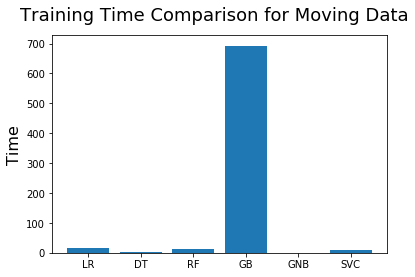

In [256]:
# Plot the training time for each classifier
fig = plt.figure()
index = np.arange(len(model))
plt.bar(index, train_time)
fig.suptitle('Training Time Comparison for Moving Data', fontsize=18)
plt.ylabel('Time', fontsize=16)
plt.xticks(index, model)

([<matplotlib.axis.XTick at 0x134872e90>,
 <a list of 6 Text xticklabel objects>)

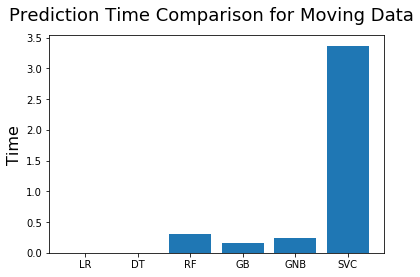

In [255]:
# Plot the prediction time for each classifier
fig = plt.figure()
index = np.arange(len(model))
plt.bar(index, pred_time)
fig.suptitle('Prediction Time Comparison for Moving Data', fontsize=18)
plt.ylabel('Time', fontsize=16)
plt.xticks(index, model)

## Conclusions



And we can see here, with similar performance results, linear regression and random forest are much faster than gradient boosting in training and predicting. Linear regression is also faster than random forest for prediction.

## Modeling - Sedentary


### Baseline - Randomly guessing

In [178]:
from random import randint
rand_pred_sedentary = []
for x in X_test_sedentary_new:
    # generate a random number between 1 and 30 (including 1 & 30)
    rand_pred_sedentary.append(randint(1, 31))
rand_pred_sedentary = np.asarray(rand_pred_sedentary)

In [186]:
res = [1 if a == b else 0 for a, b in zip(rand_pred_sedentary, y_test_sedentary)]

In [187]:
acc = float(sum(res))/len(res)
acc

0.02936096718480138

The result for randomly predicting is also around 3%, similar to moving ones, as expected.

Now let's try the same classifiers we tried with moving data.

In [257]:
model = []
accuracy = []
train_time = []
pred_time = []

for clf in Classifiers:
    start = time()
    fit=clf.fit(X_train_sedentary, y_train_sedentary)
    end = time()
    train_time.append(end - start)
    start = time()
    pred=fit.predict(X_test_sedentary)
    end = time()
    pred_time.append(end - start)
    model.append(clf.__class__.__name__)
    accuracy.append(accuracy_score(y_test_sedentary, pred))

In [258]:
model

['LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'GradientBoostingClassifier',
 'GaussianNB',
 'SVC']

In [259]:
# Give shorter name for plotting 
model = ['LR', 'DT', 'RF', 'GB', 'GNB', 'SVC']

([<matplotlib.axis.XTick at 0x132a1fad0>,
 <a list of 6 Text xticklabel objects>)

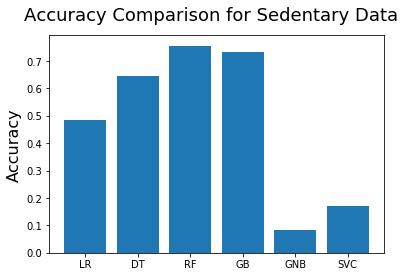

In [266]:
# Plot the accuracy for each classifier
fig = plt.figure()
index = np.arange(len(model))
plt.bar(index, accuracy)
fig.suptitle('Accuracy Comparison for Sedentary Data', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(index, model)


([<matplotlib.axis.XTick at 0x119be0c90>,
 <a list of 6 Text xticklabel objects>)

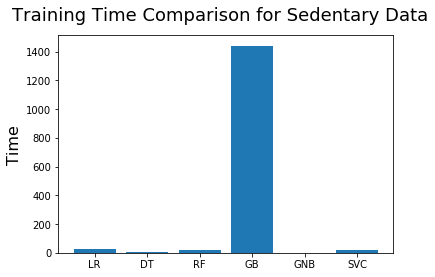

In [267]:
# Plot the training time for each classifier
fig = plt.figure()
index = np.arange(len(model))
plt.bar(index, train_time)
fig.suptitle('Training Time Comparison for Sedentary Data', fontsize=18)
plt.ylabel('Time', fontsize=16)
plt.xticks(index, model)

([<matplotlib.axis.XTick at 0x13a4ba910>,
 <a list of 6 Text xticklabel objects>)

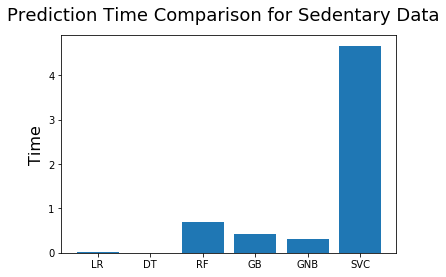

In [268]:
# Plot the prediction time for each classifier
fig = plt.figure()
index = np.arange(len(model))
plt.bar(index, pred_time)
fig.suptitle('Prediction Time Comparison for Sedentary Data', fontsize=18)
plt.ylabel('Time', fontsize=16)
plt.xticks(index, model)

## Conclusion

So for sedentary data, the overall accuracies for our models drop to less than 70%.

## Evaluation


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
plt.show()

### The Confusion Matrix

Conclusion
The feature selection can hugely decrease the running time of complicated model, without obviously jeopardizing the performance of model.

The overall accuracy of the model will not be necessarily compromised by shrinking the size of the data set. The main reason is that good feature selection may prevent over-fitting to some extents.

SVM +Boosting in an Ensamble

## What I learned

- Feature selection
    - cheaper to measure, train, and predict
    - improve accuracy by excluding irrelevant vairables
    - More understandable for human

## Self-check

1. Dataset Augmentation

- Generating the dataset by myself is limited by the time and equipment constraint
- Accelerometer & force & marker data are all generated in lab setting with participants only walking at a certain speed. The data is too regular and the degree of freedom is too small to even need to be fed into a classifier. Simple linear threshold can do a good job of finding the local maxima and minima to identify Heel Strike and Toe Off events. And it's for sure that the model won't generalize well for outdoor real-life events.
- So what may be more interesting from those datasets is the frequency analysis of the gait cycles. 
- The human activity dataset from Kaggle is better in both the complexity of activity types, it has already been labeled manually, by examining video clips 

I tried to contact the open-source MAREA gait database but haven't heard from them yet.

2. Multiplicity of models

I trained 3 models in parallel, however, they all use the same input, same attributes.

-> foot force data for neural network 


3. Visualization



4. Regularization

Regularization cannot save me. 

## Limitations

- Dataset
  - No labels
  - Normal walking and running in the sagittal plane on level ground
    - May not generalize when the walking speed changes
    - Haven't considered toe walkers
  - Only acclerometer data was used. Potential features include:
    - gyroscope data
    - foot angular velocity data
    - sensors on the shank, thigh and foot of both left & right side
    - video captures
  - Test on both healthy individuals and patients, different age groups
- Models
  - No ground truth values for HS and TO
  - There is no scientific evaluation method, evaluation was done visually



## References


- Hebenstreit, F., Leibold, A., Krinner, S., Welsch, G., Lochmann, M., Eskofier, B.M. (2014) Are Relative Gait Phase Durations Speed Dependent?, submitted.

- Gait Partitioning Methods: A Systematic Review 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4732099/

- Weijun Tao 1, Tao Liu 2,*, Rencheng Zheng 3 and Hutian Feng 1 Gait Analysis Using Wearable Sensors

- Introduction of gait cycle https://www.physio-pedia.com/Gait

- A Neural Network-Based Gait Phase Classification Method Using Sensors Equipped on Lower Limb Exoskeleton Robots

- Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. International Workshop of Ambient Assisted Living (IWAAL 2012). Vitoria-Gasteiz, Spain. Dec 2012 https://www.icephd.org/sites/default/files/IWAAL2012.pdf

- Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz. Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science. Special Issue in Ambient Assisted Living: Home Care. Volume 19, Issue 9. May 2013 https://pdfs.semanticscholar.org/dc70/24840a4ba7ab634517fae53e77695ff5dda9.pdf

- Jorge Luis Reyes-Ortiz, Alessandro Ghio, Xavier Parra-Llanas, Davide Anguita, Joan Cabestany, Andreu Català. Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf

- [1] Reunanen, J. (2003). Overfitting in making comparisons between variable selection methods. The Journal of Machine Learning Research, 3, 1371-1382.
